# Spectral Analysis - Dried brick

Dried brick with removal of background, holes and oversaturated pixels.

No removal of mortar or edges of brick. 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hoggorm as ho
import hoggormplot as hopl
np.bool = np.bool_
from scipy import stats
from matplotlib.axes import Axes

C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\marth\AppData\Local\Temp/ipykernel_14396/564171862.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import SNV dried spectra

In [2]:
data = pd.read_excel(r"C:\Users\marth\OneDrive\Skole\Master\Kode\murstein-master-2024\Streamline v2\Resultater 2\dried spectra\dried mean snv spectra\excel\All Dried Bricks Mean Spectra after SNV.xlsx")

data

,Unnamed: 0,953,959,964,970,975,981,986,991,997,...,2478,2483,2489,2494,2499,2505,2510,2516,group,brick_id
0,0,4.565532,4.426683,4.289347,4.149393,4.005696,3.855549,3.704191,3.549696,3.396309,...,0.624059,0.673270,0.720120,0.766627,0.813061,0.860329,0.908584,0.957024,1,A9_B
1,1,4.151126,4.029180,3.908142,3.783466,3.653087,3.515140,3.373692,3.229439,3.084309,...,1.430615,1.499362,1.560579,1.616014,1.665567,1.711112,1.754476,1.797956,1,A9_B
2,2,4.312301,4.185999,4.060699,3.932531,3.798960,3.659277,3.516435,3.371315,3.226030,...,1.130460,1.193415,1.251063,1.303841,1.354131,1.402268,1.448663,1.495194,1,A9_B
3,3,4.453869,4.326724,4.200786,4.071784,3.938859,3.799175,3.657884,3.513328,3.369269,...,0.668974,0.722133,0.772058,0.821395,0.869611,0.918050,0.967228,1.016589,1,A9_B
4,4,3.960836,3.854389,3.748570,3.638634,3.522230,3.398425,3.270663,3.139611,3.007323,...,1.532624,1.607428,1.673751,1.733680,1.786026,1.833575,1.877959,1.922453,1,A9_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1459,-0.449524,-0.468592,-0.487651,-0.508983,-0.532553,-0.558065,-0.581503,-0.603647,-0.622824,...,3.180135,3.283329,3.370622,3.428861,3.459504,3.460933,3.445725,3.430522,9,FV6_A
1460,1460,2.646295,2.553576,2.461006,2.365956,2.259442,2.141244,2.020267,1.904590,1.789848,...,2.425596,2.530797,2.615649,2.662532,2.675488,2.639719,2.589639,2.539603,9,FV6_A
1461,1461,0.231366,0.212971,0.194584,0.172347,0.154337,0.132413,0.112266,0.092007,0.077699,...,2.951391,3.092954,3.212595,3.313301,3.392945,3.456601,3.517977,3.579440,9,FV6_A
1462,1462,-0.627968,-0.625167,-0.622365,-0.621349,-0.623858,-0.628883,-0.633631,-0.637198,-0.639921,...,3.070296,3.144436,3.204003,3.240325,3.251428,3.242422,3.219674,3.196946,9,FV6_A


## Remove the BB20_A and SVB5_A sides

In [3]:
remove = data[(data.brick_id == 'BB20_A') | (data.brick_id == 'SVB5_A')].index
data = data.drop(remove)
data = data.reset_index(drop=True)
data

,Unnamed: 0,953,959,964,970,975,981,986,991,997,...,2478,2483,2489,2494,2499,2505,2510,2516,group,brick_id
0,0,4.565532,4.426683,4.289347,4.149393,4.005696,3.855549,3.704191,3.549696,3.396309,...,0.624059,0.673270,0.720120,0.766627,0.813061,0.860329,0.908584,0.957024,1,A9_B
1,1,4.151126,4.029180,3.908142,3.783466,3.653087,3.515140,3.373692,3.229439,3.084309,...,1.430615,1.499362,1.560579,1.616014,1.665567,1.711112,1.754476,1.797956,1,A9_B
2,2,4.312301,4.185999,4.060699,3.932531,3.798960,3.659277,3.516435,3.371315,3.226030,...,1.130460,1.193415,1.251063,1.303841,1.354131,1.402268,1.448663,1.495194,1,A9_B
3,3,4.453869,4.326724,4.200786,4.071784,3.938859,3.799175,3.657884,3.513328,3.369269,...,0.668974,0.722133,0.772058,0.821395,0.869611,0.918050,0.967228,1.016589,1,A9_B
4,4,3.960836,3.854389,3.748570,3.638634,3.522230,3.398425,3.270663,3.139611,3.007323,...,1.532624,1.607428,1.673751,1.733680,1.786026,1.833575,1.877959,1.922453,1,A9_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1459,-0.449524,-0.468592,-0.487651,-0.508983,-0.532553,-0.558065,-0.581503,-0.603647,-0.622824,...,3.180135,3.283329,3.370622,3.428861,3.459504,3.460933,3.445725,3.430522,9,FV6_A
1436,1460,2.646295,2.553576,2.461006,2.365956,2.259442,2.141244,2.020267,1.904590,1.789848,...,2.425596,2.530797,2.615649,2.662532,2.675488,2.639719,2.589639,2.539603,9,FV6_A
1437,1461,0.231366,0.212971,0.194584,0.172347,0.154337,0.132413,0.112266,0.092007,0.077699,...,2.951391,3.092954,3.212595,3.313301,3.392945,3.456601,3.517977,3.579440,9,FV6_A
1438,1462,-0.627968,-0.625167,-0.622365,-0.621349,-0.623858,-0.628883,-0.633631,-0.637198,-0.639921,...,3.070296,3.144436,3.204003,3.240325,3.251428,3.242422,3.219674,3.196946,9,FV6_A


## Outlier removal


In [4]:
data = data.iloc[:,1:]
zdata = data[(np.abs(stats.zscore(data.iloc[:, :288])) < 3).all(axis=1)]  # eller bruk any
zdata = zdata.reset_index(drop=True)

int_data = zdata.iloc[:, :288]
#int_data = data.iloc[:, :288]
#data_cut_20_first = int_data.iloc[:,20:]
#data_cut_20_last = data_cut_20_first.iloc[:, :-20]

#zdata = data_cut_20_last[(np.abs(stats.zscore(data_cut_20_last.iloc[:, :288])) < 3).all(axis=1)]  # eller bruk any
#zdata = zdata.reset_index(drop=True)

group_ids = list(zdata["group"])
brick_ids = list(zdata["brick_id"])

zdata

,953,959,964,970,975,981,986,991,997,1002,...,2478,2483,2489,2494,2499,2505,2510,2516,group,brick_id
0,4.565532,4.426683,4.289347,4.149393,4.005696,3.855549,3.704191,3.549696,3.396309,3.241803,...,0.624059,0.673270,0.720120,0.766627,0.813061,0.860329,0.908584,0.957024,1,A9_B
1,4.151126,4.029180,3.908142,3.783466,3.653087,3.515140,3.373692,3.229439,3.084309,2.937679,...,1.430615,1.499362,1.560579,1.616014,1.665567,1.711112,1.754476,1.797956,1,A9_B
2,4.312301,4.185999,4.060699,3.932531,3.798960,3.659277,3.516435,3.371315,3.226030,3.079645,...,1.130460,1.193415,1.251063,1.303841,1.354131,1.402268,1.448663,1.495194,1,A9_B
3,4.453869,4.326724,4.200786,4.071784,3.938859,3.799175,3.657884,3.513328,3.369269,3.223572,...,0.668974,0.722133,0.772058,0.821395,0.869611,0.918050,0.967228,1.016589,1,A9_B
4,3.960836,3.854389,3.748570,3.638634,3.522230,3.398425,3.270663,3.139611,3.007323,2.872941,...,1.532624,1.607428,1.673751,1.733680,1.786026,1.833575,1.877959,1.922453,1,A9_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,-0.297915,-0.305934,-0.313952,-0.324527,-0.340674,-0.362344,-0.384774,-0.405103,-0.423117,-0.440257,...,3.191161,3.284283,3.360366,3.408309,3.428768,3.415495,3.388169,3.360864,9,FV6_A
1295,-0.449524,-0.468592,-0.487651,-0.508983,-0.532553,-0.558065,-0.581503,-0.603647,-0.622824,-0.638800,...,3.180135,3.283329,3.370622,3.428861,3.459504,3.460933,3.445725,3.430522,9,FV6_A
1296,2.646295,2.553576,2.461006,2.365956,2.259442,2.141244,2.020267,1.904590,1.789848,1.676662,...,2.425596,2.530797,2.615649,2.662532,2.675488,2.639719,2.589639,2.539603,9,FV6_A
1297,0.231366,0.212971,0.194584,0.172347,0.154337,0.132413,0.112266,0.092007,0.077699,0.065680,...,2.951391,3.092954,3.212595,3.313301,3.392945,3.456601,3.517977,3.579440,9,FV6_A


In [5]:
data_cut_20_first = int_data.iloc[:,20:]
data_cut_20_last = data_cut_20_first.iloc[:, :-20]
data_cut_20_last

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2358,2363,2369,2374,2380,2385,2391,2396,2401,2407
0,1.747048,1.634284,1.526387,1.419680,1.316786,1.216594,1.121284,1.029719,0.943734,0.860897,...,-0.272513,-0.265790,-0.253857,-0.236122,-0.213660,-0.186580,-0.156345,-0.122404,-0.085490,-0.044638
1,1.468226,1.354908,1.245704,1.138428,1.034403,0.933050,0.835762,0.742161,0.653531,0.568378,...,0.132134,0.135685,0.148317,0.171432,0.203712,0.244065,0.289951,0.340729,0.395929,0.455744
2,1.634684,1.523942,1.416831,1.311854,1.211040,1.113066,1.019293,0.928666,0.842770,0.759366,...,-0.048159,-0.045442,-0.035205,-0.014784,0.013473,0.048596,0.089058,0.134951,0.183942,0.237819
3,1.785594,1.674952,1.568624,1.463215,1.361427,1.261981,1.167060,1.075734,0.989946,0.907022,...,-0.259475,-0.254975,-0.244836,-0.227906,-0.205340,-0.177907,-0.147146,-0.112459,-0.074912,-0.033316
4,1.486083,1.376202,1.269635,1.164686,1.062610,0.963046,0.867056,0.774604,0.686383,0.601313,...,0.186813,0.185612,0.193935,0.214528,0.245686,0.286514,0.333115,0.385599,0.442617,0.504705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,-0.492562,-0.489170,-0.486585,-0.485365,-0.483138,-0.479520,-0.476556,-0.472352,-0.466030,-0.461307,...,1.050551,1.020305,1.008431,1.023057,1.063295,1.124670,1.202955,1.293329,1.393116,1.502718
1295,-0.662007,-0.653841,-0.645431,-0.636562,-0.630783,-0.624796,-0.620142,-0.610867,-0.600890,-0.587562,...,0.681205,0.664398,0.667922,0.697095,0.754077,0.833515,0.928831,1.037377,1.157504,1.289006
1296,0.794102,0.741516,0.689992,0.641131,0.597716,0.556952,0.514753,0.476300,0.441155,0.405556,...,-0.430781,-0.443250,-0.434533,-0.397404,-0.337205,-0.253721,-0.150917,-0.035027,0.093850,0.239810
1297,0.092143,0.105546,0.118868,0.124608,0.129496,0.133867,0.137458,0.147613,0.164090,0.180108,...,-0.299907,-0.328455,-0.330083,-0.300184,-0.236028,-0.140661,-0.023161,0.111337,0.262096,0.429993


In [5]:
#brick_ids

## Apply PCA to SNV dataset

In [6]:
data_vals= data_cut_20_last.values
col_names = list(data_cut_20_last.columns)


In [7]:
model = ho.nipalsPCA(arrX=data_vals, numComp=5, Xstand=False, cvType=["loo"])
#hopl.plot(model, comp=[1, 2], 
#         plots=[1, 2, 3, 4], 
#         objNames=brick_ids, 
#         XvarNames=col_names, figsize=(20,20))

loo


In [10]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,80.037967
PC2,10.093352
PC3,4.552249
PC4,3.941881
PC5,0.588408


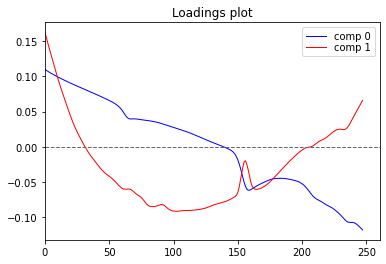

In [11]:
hopl.loadings(model, comp=[0,1], line=True) #pc1 pc2

In [8]:
# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_loadings())
loadings_df.index = col_names
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4,PC5
1062,0.109906,0.162894,0.113396,0.113780,0.081830
1068,0.108733,0.155938,0.098146,0.102911,0.070979
1073,0.107586,0.149094,0.083649,0.092459,0.060286
1079,0.106456,0.142312,0.069552,0.082399,0.049612
1084,0.105378,0.135738,0.056129,0.072882,0.039293
...,...,...,...,...,...
2385,-0.110959,0.052717,-0.086863,-0.040398,0.028811
2391,-0.112556,0.055869,-0.079996,-0.050304,0.020721
2396,-0.114295,0.059158,-0.072411,-0.061670,0.012318
2401,-0.116168,0.062512,-0.064352,-0.074197,0.003648


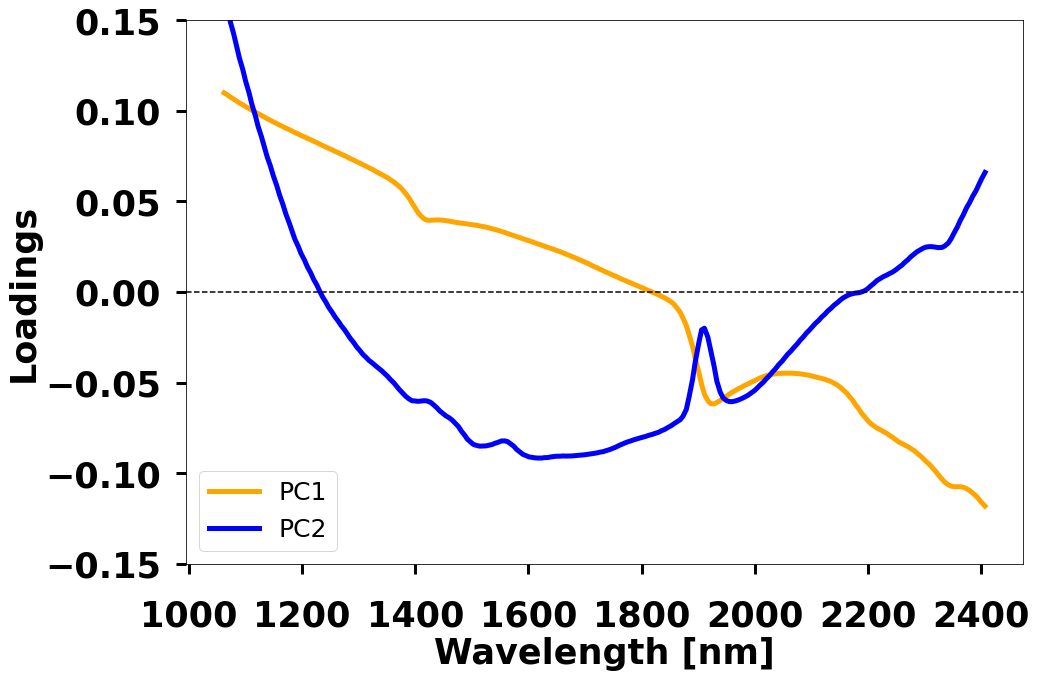

In [9]:
#PC1 PC2
ww = col_names
plt.figure(figsize=(15,10))
plt.plot(ww, loadings_df.iloc[:, 0], label='PC1', color='orange', linewidth=5)
#plt.title['Loading plot - PC1 and PC2']
plt.plot(ww, loadings_df.iloc[:, 1], label='PC2', c='b', linewidth=5)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(fontsize='25', loc="lower left")
plt.xlabel('Wavelength [nm]', fontsize=35, fontweight='bold')
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.ylabel('Loadings', fontsize=35, fontweight='bold')
plt.ylim(-0.15, 0.15)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.set_pad(25)  # Set the padding between tick mark and label
for tick in plt.gca().yaxis.get_major_ticks():
    tick.set_pad(15)  # Set the padding between tick mark and label
# Adjust the size of tick marks
plt.tick_params(axis='both', which='major', length=10, width=3)

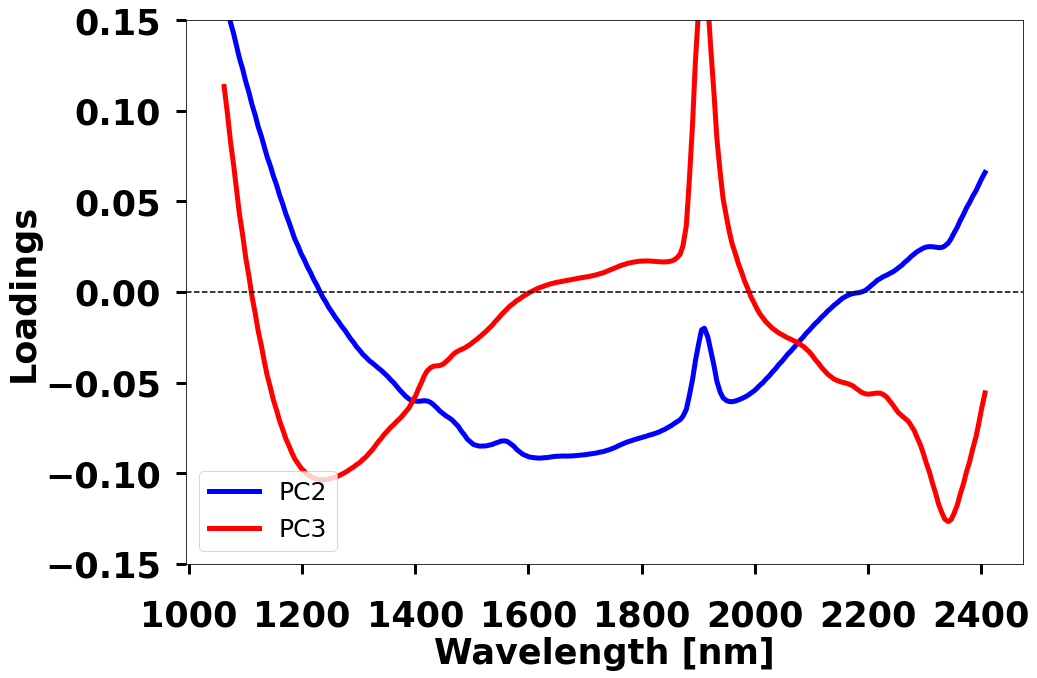

In [10]:
#PC2 PC3
ww = col_names
plt.figure(figsize=(15,10))
plt.plot(ww, loadings_df.iloc[:, 1], label='PC2', color='b', linewidth=5)
#plt.title['Loading plot - PC1 and PC2']
plt.plot(ww, loadings_df.iloc[:, 2], label='PC3', c='r', linewidth=5)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(fontsize='25', loc="lower left")
plt.xlabel('Wavelength [nm]', fontsize=35, fontweight='bold')
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.ylabel('Loadings', fontsize=35, fontweight='bold')
plt.ylim(-0.15, 0.15)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.set_pad(25)  # Set the padding between tick mark and label
for tick in plt.gca().yaxis.get_major_ticks():
    tick.set_pad(15)  # Set the padding between tick mark and label
# Adjust the size of tick marks
plt.tick_params(axis='both', which='major', length=10, width=3)

In [14]:
loadings = model.X_loadings()
scores = model.X_scores()

# Biplot
SNV

In [13]:
def biplot_spectra(score, comp1, comp2, loads, labels=None):
    fig = plt.figure(figsize=(20,20))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
  
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=100, c=group_ids, cmap='tab10', edgecolor='black', label=group_ids)
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=20)
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=20)
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="lower left", title="Brick groups", fontsize=25, title_fontsize=30)
    ax1.add_artist(legend1)
    
    for i in range(score.shape[0]):
        xpos = score[:, comp1][i]-0.5
        ypos = score[:, comp2][i]
        plt.text(xpos, ypos, brick_ids[i], color='black', ha='right', va='top', fontsize=11)
        
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')

    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red') # Put your speed/rotation plot here
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=20)
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=20)
#
    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=12)
    plt.title(f'Score plot', fontsize=25)
    ##plt.legend()
    ##ax1.legend()
    plt.show()

In [21]:
# The biplot adapted for use in the thesis, with larger and more visible text. 
# The two functions do the same in practise.
def biplot_zspectra(score, comp1, comp2, loads, labels=None):
    fig = plt.figure(figsize=(20,20))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
      
    # Score plot
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=150, c=group_ids, cmap='tab10', edgecolor='black', label=group_ids)
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=30, fontweight="bold")
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=30, fontweight="bold")
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="lower left", title="Brick groups", fontsize=25, title_fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tick_params(axis='both', which='major', length=10, width=3)
    ax1.add_artist(legend1)
    
    # plot sample id's
    #for i in range(score.shape[0]):
    #    xpos = score[:, comp1][i]-0.5
    #    ypos = score[:, comp2][i]
    #    plt.text(xpos, ypos, zdata["brick_id"][zdata.index[i]], color='black', ha='right', va='top', fontsize=15)  # if zscore is involved
    
    # The axis for the loadings
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')
    
    # The loading plot
    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red', s=100) # Put your speed/rotation plot here
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=30, fontweight="bold")
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=30, fontweight="bold")
 ####
    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=25, fontweight="medium")
   ## plt.title(f'Score plot', fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tick_params(axis='both', which='major', length=10, width=3)

    plt.show()

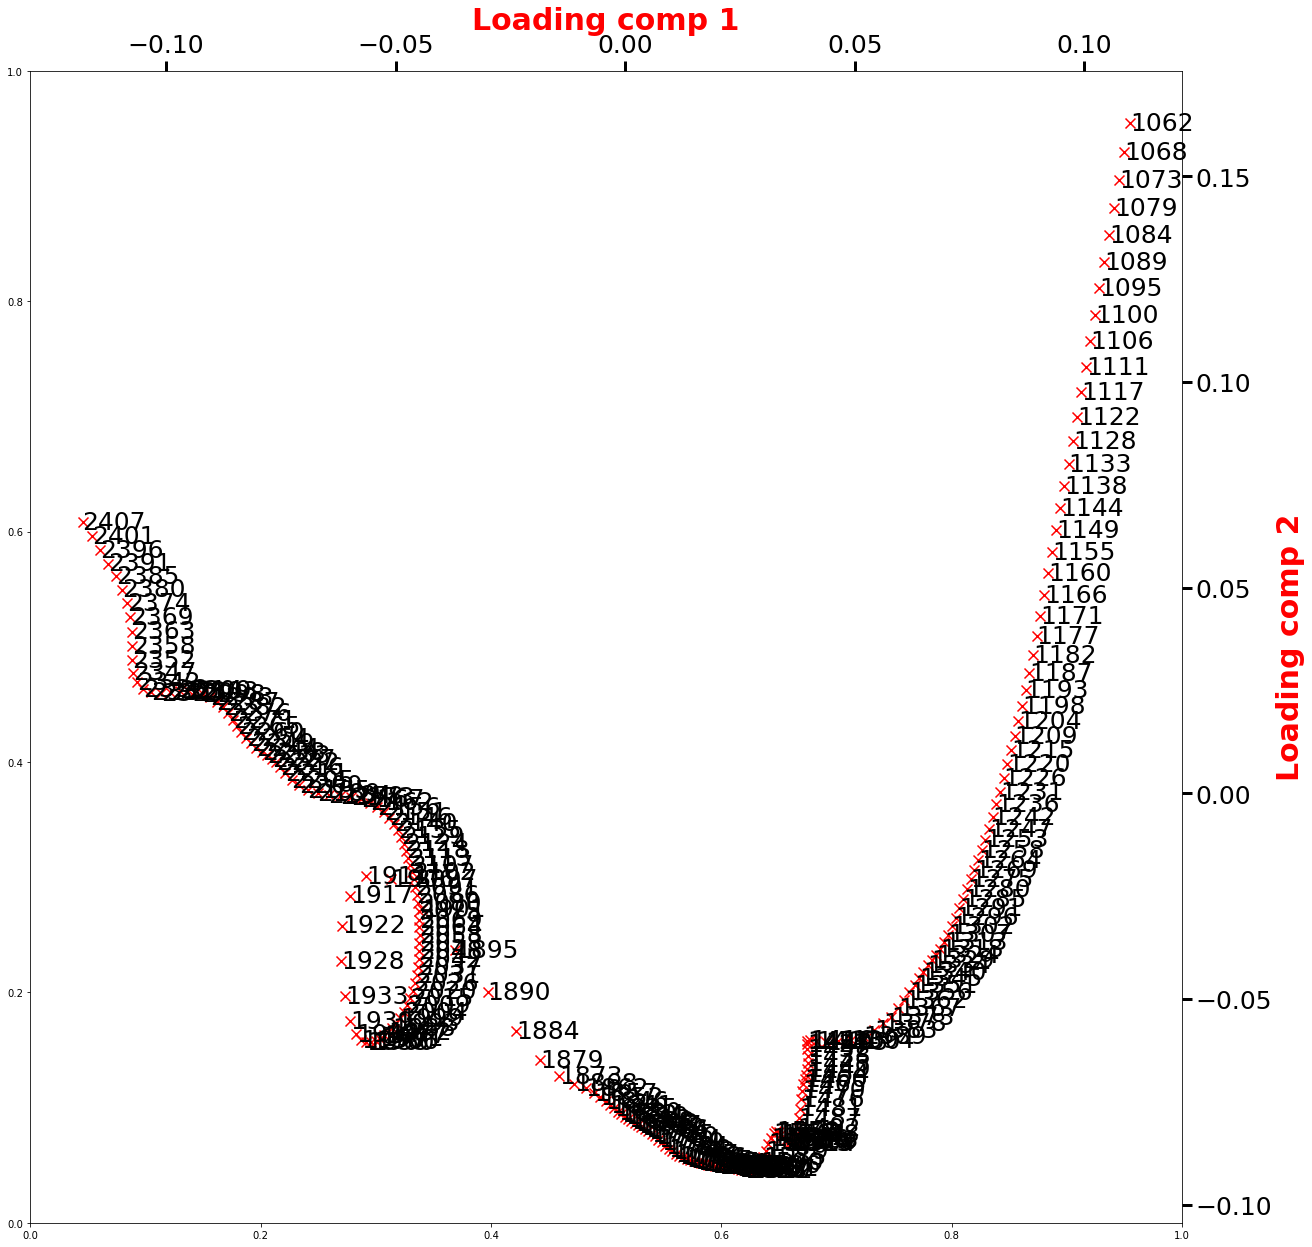

In [17]:
biplot_zspectra(scores, 0, 1, loadings, labels=col_names)

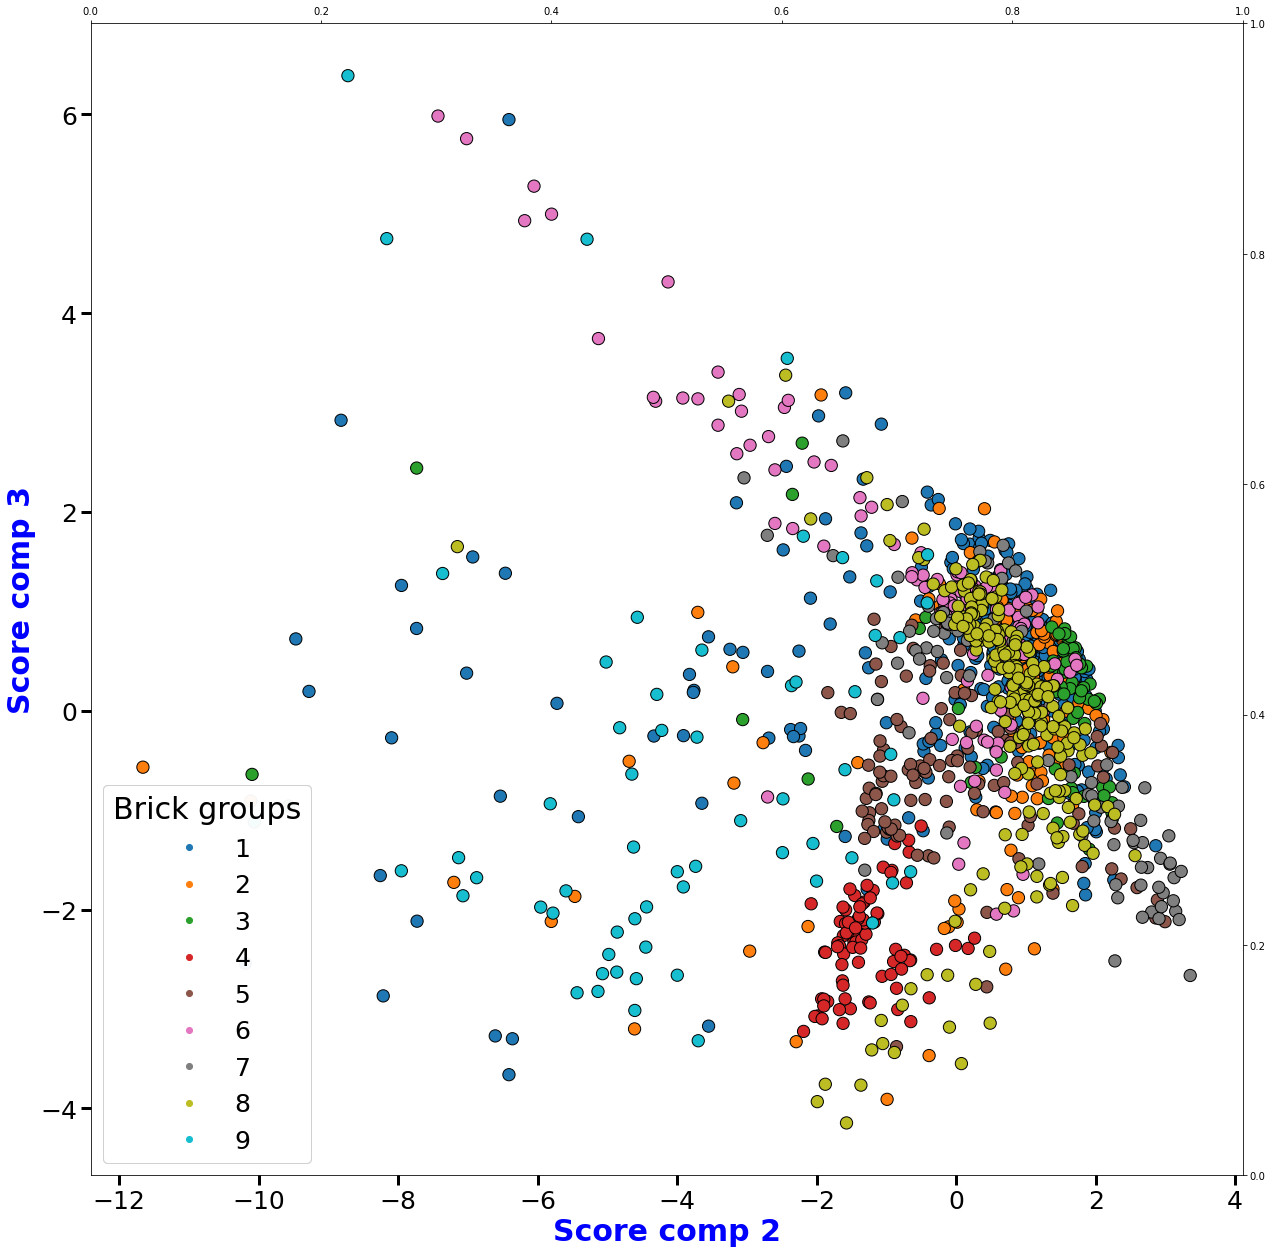

In [22]:
biplot_zspectra(scores, 1, 2, loadings, labels=col_names)

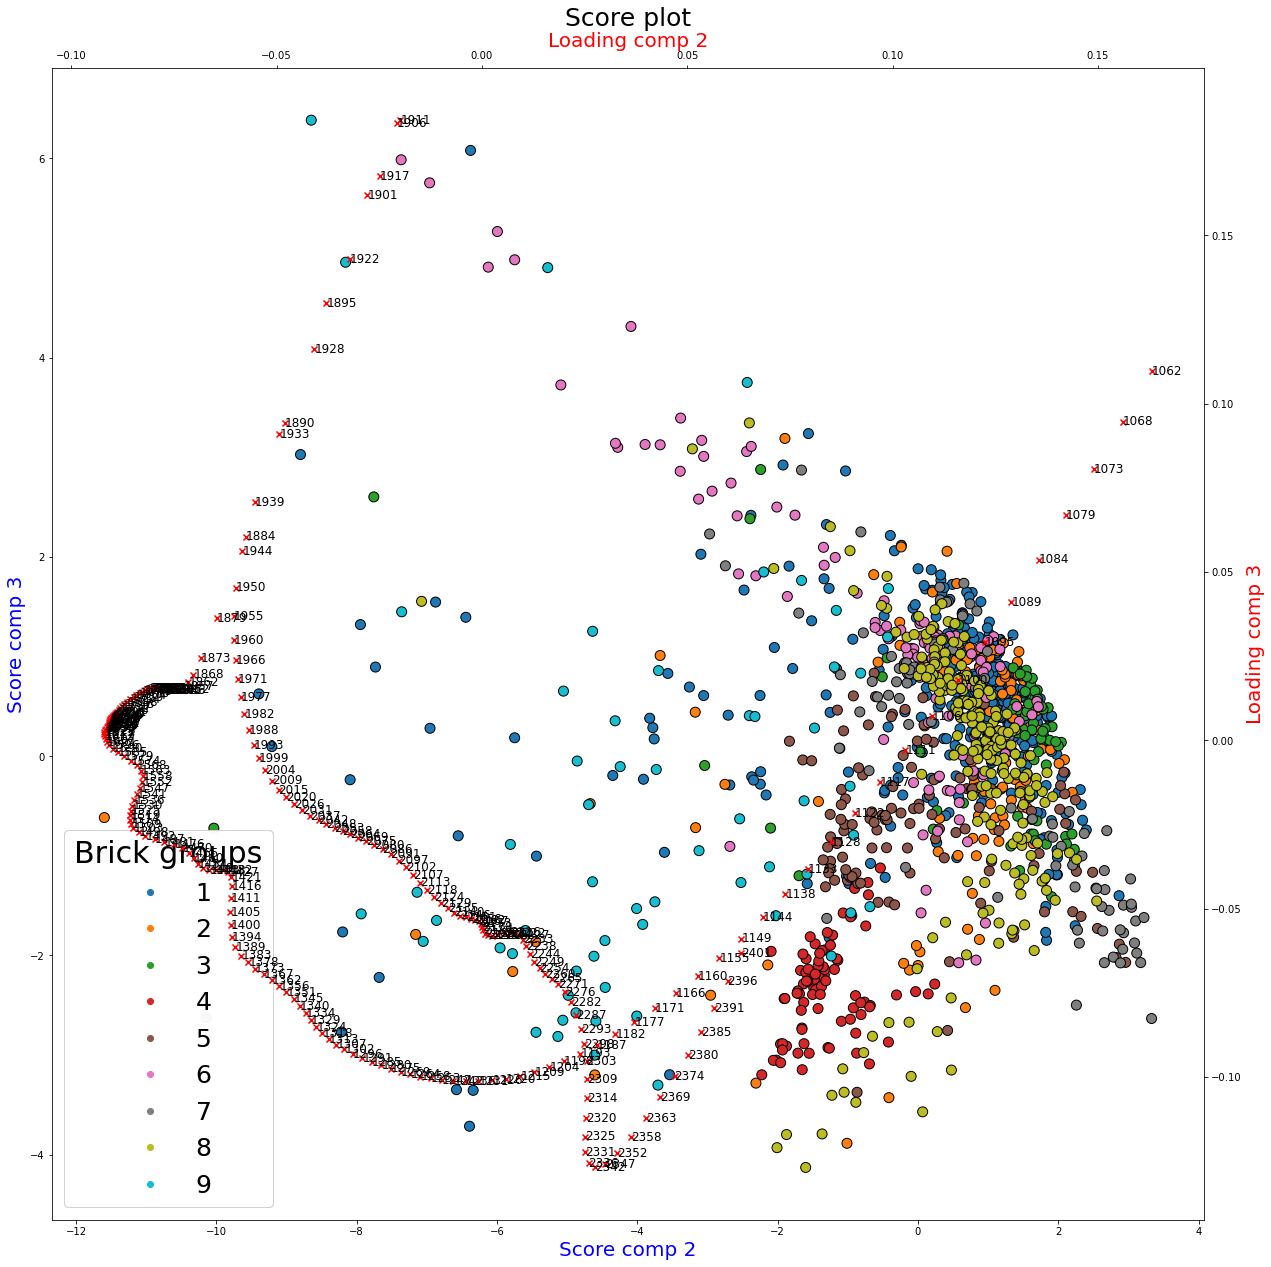

In [32]:
biplot_spectra(scores, 1, 2, loadings, labels=col_names)

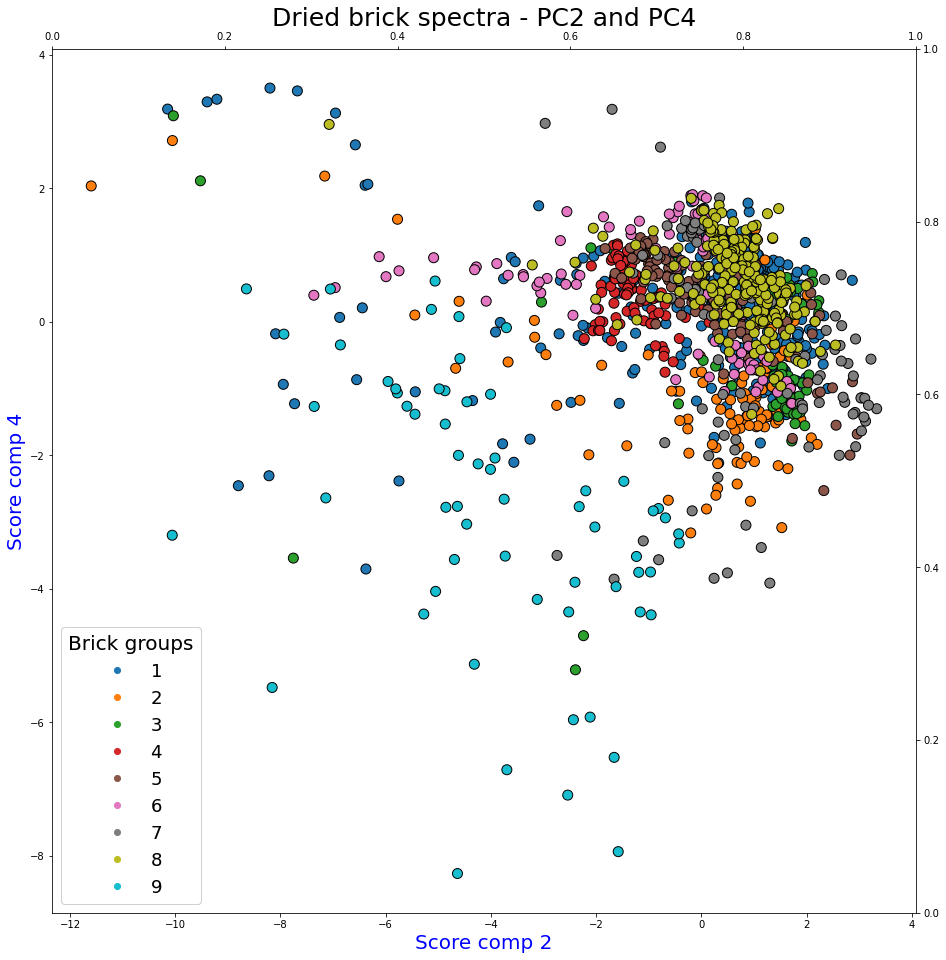

In [27]:
biplot_spectra(scores, 1, 3, loadings, labels=col_names)

# SNV Biplots of only group 9 and group 7

In [7]:
red = zdata.query('group == 9 | group==7')
red = red.reset_index(drop=True)
red

,953,959,964,970,975,981,986,991,997,1002,...,2478,2483,2489,2494,2499,2505,2510,2516,group,brick_id
0,4.607557,4.453309,4.300566,4.145146,3.987251,3.823709,3.660380,3.495266,3.332934,3.171093,...,0.743687,0.791950,0.838266,0.884673,0.930374,0.976152,1.022217,1.068419,7,SAGA1_A
1,4.513503,4.374421,4.236621,4.095876,3.950061,3.798616,3.645075,3.490828,3.337760,3.185245,...,0.656421,0.697404,0.735437,0.770550,0.803906,0.835033,0.864457,0.893938,7,SAGA1_A
2,4.566143,4.416444,4.268159,4.117773,3.962786,3.803146,3.642115,3.480190,3.320086,3.160096,...,0.807963,0.852822,0.895178,0.935593,0.974815,1.010694,1.046076,1.081538,7,SAGA1_A
3,4.570139,4.420695,4.272663,4.122080,3.968064,3.808602,3.649402,3.488092,3.329368,3.170987,...,0.761234,0.809582,0.856342,0.903366,0.949948,0.995361,1.041197,1.087168,7,SAGA1_A
4,4.472536,4.339517,4.207662,4.072905,3.932604,3.786153,3.637382,3.487725,3.338589,3.189707,...,0.677125,0.716988,0.754297,0.788049,0.819612,0.847698,0.873955,0.900258,7,SAGA1_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-0.297915,-0.305934,-0.313952,-0.324527,-0.340674,-0.362344,-0.384774,-0.405103,-0.423117,-0.440257,...,3.191161,3.284283,3.360366,3.408309,3.428768,3.415495,3.388169,3.360864,9,FV6_A
152,-0.449524,-0.468592,-0.487651,-0.508983,-0.532553,-0.558065,-0.581503,-0.603647,-0.622824,-0.638800,...,3.180135,3.283329,3.370622,3.428861,3.459504,3.460933,3.445725,3.430522,9,FV6_A
153,2.646295,2.553576,2.461006,2.365956,2.259442,2.141244,2.020267,1.904590,1.789848,1.676662,...,2.425596,2.530797,2.615649,2.662532,2.675488,2.639719,2.589639,2.539603,9,FV6_A
154,0.231366,0.212971,0.194584,0.172347,0.154337,0.132413,0.112266,0.092007,0.077699,0.065680,...,2.951391,3.092954,3.212595,3.313301,3.392945,3.456601,3.517977,3.579440,9,FV6_A


In [8]:
int_data = red.iloc[:, :288]
group_ids = list(red["group"])
brick_ids = list(red["brick_id"])

data_cut_20_first = int_data.iloc[:,20:]
data_cut_20_last = data_cut_20_first.iloc[:, :-20]
data_cut_20_last

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2358,2363,2369,2374,2380,2385,2391,2396,2401,2407
0,1.675727,1.567776,1.464580,1.362946,1.265303,1.170476,1.080435,0.994468,0.914298,0.836968,...,-0.338231,-0.319027,-0.295699,-0.267233,-0.233638,-0.195257,-0.153126,-0.106479,-0.056224,-0.001802
1,1.744940,1.639039,1.537500,1.438681,1.343404,1.251019,1.162503,1.077765,0.997657,0.920634,...,-0.365813,-0.347141,-0.324523,-0.296940,-0.265246,-0.228817,-0.188665,-0.144428,-0.097001,-0.045606
2,1.668340,1.559588,1.455523,1.354255,1.257577,1.164253,1.075197,0.989472,0.908440,0.829959,...,-0.282944,-0.263083,-0.239400,-0.210262,-0.177145,-0.138535,-0.095646,-0.048208,0.002612,0.058007
3,1.689462,1.581152,1.477427,1.375329,1.277214,1.182060,1.091283,1.004454,0.923053,0.844511,...,-0.324675,-0.305410,-0.281970,-0.253369,-0.219869,-0.181180,-0.139089,-0.092798,-0.043150,0.010627
4,1.759270,1.652280,1.549575,1.449655,1.353138,1.259830,1.170323,1.084351,1.002541,0.923878,...,-0.344599,-0.325796,-0.303132,-0.275028,-0.242945,-0.206225,-0.166079,-0.121473,-0.073984,-0.022371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-0.492562,-0.489170,-0.486585,-0.485365,-0.483138,-0.479520,-0.476556,-0.472352,-0.466030,-0.461307,...,1.050551,1.020305,1.008431,1.023057,1.063295,1.124670,1.202955,1.293329,1.393116,1.502718
152,-0.662007,-0.653841,-0.645431,-0.636562,-0.630783,-0.624796,-0.620142,-0.610867,-0.600890,-0.587562,...,0.681205,0.664398,0.667922,0.697095,0.754077,0.833515,0.928831,1.037377,1.157504,1.289006
153,0.794102,0.741516,0.689992,0.641131,0.597716,0.556952,0.514753,0.476300,0.441155,0.405556,...,-0.430781,-0.443250,-0.434533,-0.397404,-0.337205,-0.253721,-0.150917,-0.035027,0.093850,0.239810
154,0.092143,0.105546,0.118868,0.124608,0.129496,0.133867,0.137458,0.147613,0.164090,0.180108,...,-0.299907,-0.328455,-0.330083,-0.300184,-0.236028,-0.140661,-0.023161,0.111337,0.262096,0.429993


In [9]:
# Define a dictionary to map numerical values to string labels
#label_map = {num_label: str_label for num_label, str_label in zip(set(group_ids), type_list)}

label_map = {7: 'porous', 9: 'hard burnt'}
label_map

{7: 'porous', 9: 'hard burnt'}

In [10]:
data_vals= data_cut_20_last.values
col_names = list(data_cut_20_last.columns)

In [11]:
model = ho.nipalsPCA(arrX=data_vals, numComp=5, Xstand=False, cvType=["loo"])
#hopl.plot(model, comp=[1, 2], 
#         plots=[1, 2, 3, 4], 
#         objNames=brick_ids, 
#         XvarNames=col_names, figsize=(20,20))

loo


In [12]:
loadings = model.X_loadings()
scores = model.X_scores()

In [61]:
scores

array([[ 3.49928339e+00,  8.77445243e-01,  2.66800083e+00,
         3.25139510e-01,  7.27937083e-01],
       [ 4.01233957e+00,  9.25059547e-01,  2.62779111e+00,
         1.34412322e-01,  7.00713464e-01],
       [ 3.24535116e+00,  1.04203602e+00,  2.48546133e+00,
         3.67984692e-01,  7.75493163e-01],
       [ 3.40264290e+00,  9.74515929e-01,  2.68685200e+00,
         3.85405431e-01,  7.43929958e-01],
       [ 3.74822110e+00,  1.11320842e+00,  2.70993658e+00,
         2.97843344e-01,  6.80111411e-01],
       [ 3.43521395e+00,  9.92963337e-01,  2.74801951e+00,
         4.10799876e-01,  7.03906905e-01],
       [ 3.26180445e+00,  1.03523335e+00,  2.73820572e+00,
         4.34764871e-01,  7.75023623e-01],
       [ 3.52297882e+00,  1.23323975e+00,  2.71461283e+00,
         3.73514886e-01,  7.23468298e-01],
       [ 3.65178833e+00,  1.07305842e+00,  2.80721558e+00,
         2.79200396e-01,  7.38119647e-01],
       [ 3.55165268e+00,  7.88653983e-01,  2.84246861e+00,
         4.01178094e-01

In [37]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,72.525652
PC2,16.348726
PC3,6.785599
PC4,3.038303
PC5,0.613739


In [17]:
# Code adapted from the biplot used to present all nine brick groups.
def biplot_79_spectra(score, comp1, comp2, loads, labels=None):
    fig = plt.figure(figsize=(15,15))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
      
    # Score plot
    #scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=100, c=group_ids, cmap='coolwarm', edgecolor='black', label=group_ids)
    scatter1 = ax1.scatter(score[:95, comp1], score[:95, comp2], s=150, c='lightskyblue', edgecolor='black', label=group_ids)
    scatter2 = ax1.scatter(score[96:, comp1], score[96:, comp2], s=150, c='r', edgecolor='black', label=group_ids )
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=30, fontweight="bold")
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=30, fontweight="bold")
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.tick_params(axis='both', which='major', length=10, width=3)
    #legend1 = ax1.legend(*scatter.legend_elements(),
    #                    loc="lower right", title="Brick group", fontsize=18, title_fontsize=20)
    legend1 = ax1.legend(handles=[scatter1, scatter2], labels=['Porous', 'Hard burnt'], loc="lower right", fontsize=28)
    #legend1 = ax1.legend(labels=[label_map[label] for label in set(group_ids)], loc="lower right", title="Brick type", fontsize=18, title_fontsize=20)
    ax1.add_artist(legend1)
    
    # Sample id's
    #for i in range(score.shape[0]):
    #    xpos = score[:, comp1][i]-0.5
    #    ypos = score[:, comp2][i]
    #    plt.text(xpos, ypos, brick_ids[i], color='black', ha='right', va='top', fontsize=11)
    
    # The loading axis
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')
    
    # The loadings
    #ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red') # Put your speed/rotation plot here
    #ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=20)
    #ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=20)
#
    #n = loads.shape[0]
    #for i in range(n):
    #    plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=12)
    
    #plt.title(f'Comparison of hard burnt brick and porous brick spectra, dried, after mortar removal', fontsize=25)

    plt.show()

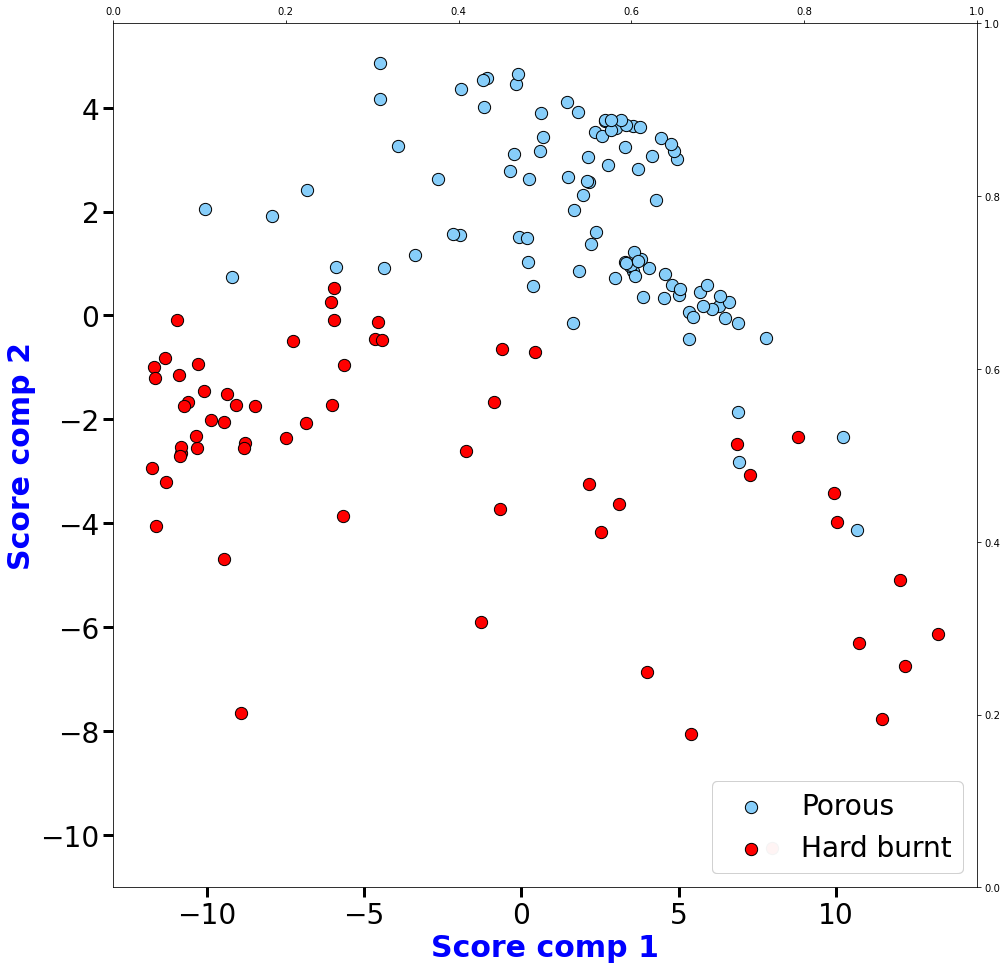

In [18]:
biplot_79_spectra(scores, 0, 1, loadings, labels=col_names)

In [19]:
loadings_df = pd.DataFrame(model.X_loadings())
loadings_df

,0,1,2,3,4
0,0.145884,0.133696,0.068381,0.101911,0.125603
1,0.141726,0.127044,0.059746,0.089010,0.112241
2,0.137738,0.120656,0.051550,0.076832,0.099341
3,0.133839,0.114528,0.043767,0.065029,0.086007
4,0.130152,0.108784,0.036367,0.053670,0.073140
...,...,...,...,...,...
243,-0.110439,0.051050,-0.083089,-0.045931,-0.000474
244,-0.110363,0.050475,-0.091176,-0.037041,-0.010036
245,-0.110191,0.049403,-0.100441,-0.026680,-0.020575
246,-0.109975,0.047968,-0.110765,-0.015436,-0.032252


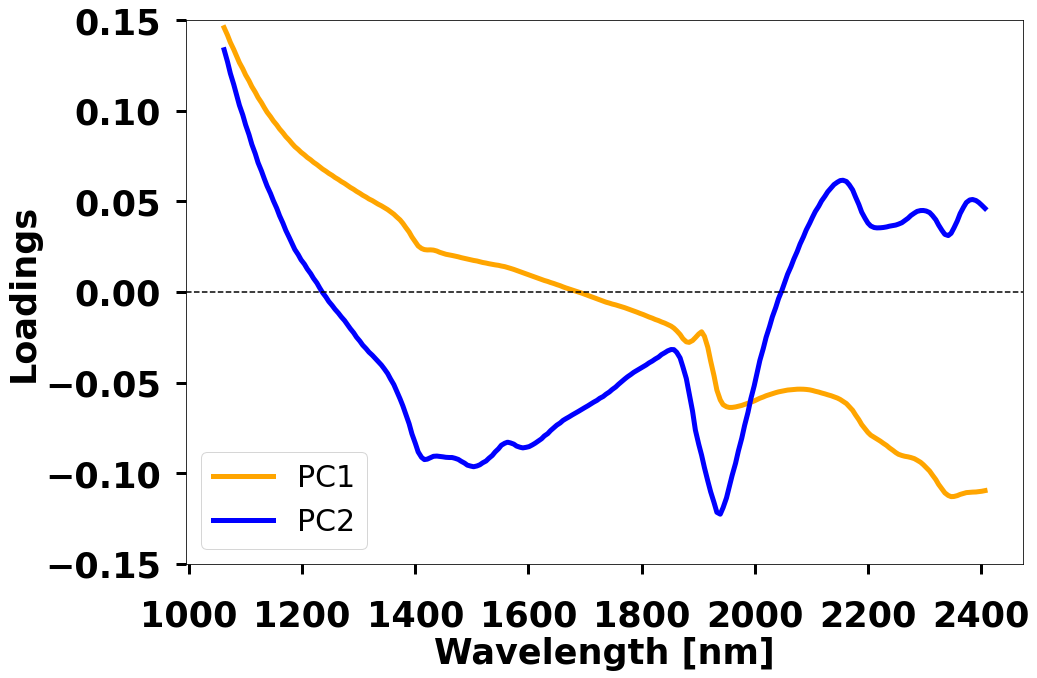

In [20]:
#PC1 PC2
ww = col_names
plt.figure(figsize=(15,10))
plt.plot(ww, loadings_df.iloc[:, 0], label='PC1', color='orange', linewidth=5)
#plt.title['Loading plot - PC1 and PC2']
plt.plot(ww, loadings_df.iloc[:, 1], label='PC2', c='b', linewidth=5)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(fontsize='30', loc="lower left")
plt.xlabel('Wavelength [nm]', fontsize=35, fontweight='bold')
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.ylabel('Loadings', fontsize=35, fontweight='bold')
plt.ylim(-0.15, 0.15)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.set_pad(25)  # Set the padding between tick mark and label
for tick in plt.gca().yaxis.get_major_ticks():
    tick.set_pad(15)  # Set the padding between tick mark and label
# Adjust the size of tick marks
plt.tick_params(axis='both', which='major', length=10, width=3)

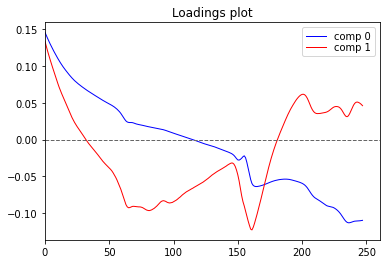

In [28]:
hopl.loadings(model, comp=[0,1], line=True)

## MSC 

In [33]:
msc_data = pd.read_excel(r"C:\Users\marth\OneDrive\Skole\Master\Kode\murstein-master-2024\Streamline v3 edge and mortar removal\MSC spectra dried\exceL\All Dried Bricks Mean Spectra after MSC.xlsx")
msc_data

,Unnamed: 0,953,959,964,970,975,981,986,991,997,...,2478,2483,2489,2494,2499,2505,2510,2516,group,brick_id
0,0,-0.062433,-0.061462,-0.060489,-0.059561,-0.058676,-0.057905,-0.057162,-0.056402,-0.055646,...,0.038851,0.038784,0.038613,0.038248,0.037693,0.036851,0.035934,0.035019,1,A4_A
1,1,-0.027790,-0.027268,-0.026746,-0.026270,-0.025878,-0.025563,-0.025279,-0.024973,-0.024678,...,0.029342,0.029482,0.029509,0.029324,0.028915,0.028234,0.027425,0.026617,1,A4_A
2,2,-0.056638,-0.055396,-0.054151,-0.052979,-0.052042,-0.051281,-0.050574,-0.049877,-0.049186,...,0.060152,0.060657,0.060879,0.060701,0.060096,0.058860,0.057408,0.055961,1,A4_A
3,3,-0.033821,-0.033273,-0.032723,-0.032199,-0.031694,-0.031253,-0.030823,-0.030392,-0.029960,...,0.018957,0.018984,0.018964,0.018818,0.018565,0.018160,0.017707,0.017254,1,A4_A
4,4,-0.054646,-0.053610,-0.052573,-0.051612,-0.050764,-0.050033,-0.049363,-0.048678,-0.048006,...,0.061369,0.062018,0.062434,0.062435,0.061961,0.060955,0.059693,0.058435,1,A4_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1459,-0.005296,-0.005520,-0.005745,-0.005996,-0.006274,-0.006575,-0.006851,-0.007111,-0.007337,...,0.037465,0.038681,0.039709,0.040395,0.040756,0.040773,0.040594,0.040415,9,FV6_A
1460,1460,0.037351,0.036043,0.034736,0.033394,0.031891,0.030223,0.028515,0.026882,0.025263,...,0.034236,0.035721,0.036919,0.037580,0.037763,0.037258,0.036552,0.035845,9,FV6_A
1461,1461,0.003582,0.003297,0.003013,0.002668,0.002390,0.002050,0.001738,0.001425,0.001203,...,0.045696,0.047887,0.049740,0.051299,0.052532,0.053518,0.054468,0.055420,9,FV6_A
1462,1462,-0.006406,-0.006377,-0.006349,-0.006338,-0.006364,-0.006415,-0.006464,-0.006500,-0.006528,...,0.031320,0.032076,0.032684,0.033054,0.033168,0.033076,0.032844,0.032612,9,FV6_A


In [34]:
remove = msc_data[(msc_data.brick_id == 'BB20_A') | (msc_data.brick_id == 'SVB5_A')].index
msc_data = msc_data.drop(remove)
msc_data

,Unnamed: 0,953,959,964,970,975,981,986,991,997,...,2478,2483,2489,2494,2499,2505,2510,2516,group,brick_id
0,0,-0.062433,-0.061462,-0.060489,-0.059561,-0.058676,-0.057905,-0.057162,-0.056402,-0.055646,...,0.038851,0.038784,0.038613,0.038248,0.037693,0.036851,0.035934,0.035019,1,A4_A
1,1,-0.027790,-0.027268,-0.026746,-0.026270,-0.025878,-0.025563,-0.025279,-0.024973,-0.024678,...,0.029342,0.029482,0.029509,0.029324,0.028915,0.028234,0.027425,0.026617,1,A4_A
2,2,-0.056638,-0.055396,-0.054151,-0.052979,-0.052042,-0.051281,-0.050574,-0.049877,-0.049186,...,0.060152,0.060657,0.060879,0.060701,0.060096,0.058860,0.057408,0.055961,1,A4_A
3,3,-0.033821,-0.033273,-0.032723,-0.032199,-0.031694,-0.031253,-0.030823,-0.030392,-0.029960,...,0.018957,0.018984,0.018964,0.018818,0.018565,0.018160,0.017707,0.017254,1,A4_A
4,4,-0.054646,-0.053610,-0.052573,-0.051612,-0.050764,-0.050033,-0.049363,-0.048678,-0.048006,...,0.061369,0.062018,0.062434,0.062435,0.061961,0.060955,0.059693,0.058435,1,A4_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1459,-0.005296,-0.005520,-0.005745,-0.005996,-0.006274,-0.006575,-0.006851,-0.007111,-0.007337,...,0.037465,0.038681,0.039709,0.040395,0.040756,0.040773,0.040594,0.040415,9,FV6_A
1460,1460,0.037351,0.036043,0.034736,0.033394,0.031891,0.030223,0.028515,0.026882,0.025263,...,0.034236,0.035721,0.036919,0.037580,0.037763,0.037258,0.036552,0.035845,9,FV6_A
1461,1461,0.003582,0.003297,0.003013,0.002668,0.002390,0.002050,0.001738,0.001425,0.001203,...,0.045696,0.047887,0.049740,0.051299,0.052532,0.053518,0.054468,0.055420,9,FV6_A
1462,1462,-0.006406,-0.006377,-0.006349,-0.006338,-0.006364,-0.006415,-0.006464,-0.006500,-0.006528,...,0.031320,0.032076,0.032684,0.033054,0.033168,0.033076,0.032844,0.032612,9,FV6_A


In [35]:
msc_data = msc_data.iloc[:,1:]
msc_zdata = msc_data[(np.abs(stats.zscore(msc_data.iloc[:, :288])) < 3).all(axis=1)]  # eller bruk any

msc_int_data = msc_zdata.iloc[:, :288]
group_ids = list(msc_zdata["group"])
msc_brick_ids = list(msc_zdata["brick_id"])

msc_int_data

,953,959,964,970,975,981,986,991,997,1002,...,2467,2472,2478,2483,2489,2494,2499,2505,2510,2516
0,-0.062433,-0.061462,-0.060489,-0.059561,-0.058676,-0.057905,-0.057162,-0.056402,-0.055646,-0.054891,...,0.038574,0.038759,0.038851,0.038784,0.038613,0.038248,0.037693,0.036851,0.035934,0.035019
1,-0.027790,-0.027268,-0.026746,-0.026270,-0.025878,-0.025563,-0.025279,-0.024973,-0.024678,-0.024370,...,0.028687,0.029063,0.029342,0.029482,0.029509,0.029324,0.028915,0.028234,0.027425,0.026617
2,-0.056638,-0.055396,-0.054151,-0.052979,-0.052042,-0.051281,-0.050574,-0.049877,-0.049186,-0.048507,...,0.058358,0.059343,0.060152,0.060657,0.060879,0.060701,0.060096,0.058860,0.057408,0.055961
3,-0.033821,-0.033273,-0.032723,-0.032199,-0.031694,-0.031253,-0.030823,-0.030392,-0.029960,-0.029534,...,0.018693,0.018846,0.018957,0.018984,0.018964,0.018818,0.018565,0.018160,0.017707,0.017254
4,-0.054646,-0.053610,-0.052573,-0.051612,-0.050764,-0.050033,-0.049363,-0.048678,-0.048006,-0.047318,...,0.059414,0.060467,0.061369,0.062018,0.062434,0.062435,0.061961,0.060955,0.059693,0.058435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,-0.005296,-0.005520,-0.005745,-0.005996,-0.006274,-0.006575,-0.006851,-0.007111,-0.007337,-0.007526,...,0.034476,0.036042,0.037465,0.038681,0.039709,0.040395,0.040756,0.040773,0.040594,0.040415
1460,0.037351,0.036043,0.034736,0.033394,0.031891,0.030223,0.028515,0.026882,0.025263,0.023665,...,0.030336,0.032359,0.034236,0.035721,0.036919,0.037580,0.037763,0.037258,0.036552,0.035845
1461,0.003582,0.003297,0.003013,0.002668,0.002390,0.002050,0.001738,0.001425,0.001203,0.001017,...,0.040482,0.043195,0.045696,0.047887,0.049740,0.051299,0.052532,0.053518,0.054468,0.055420
1462,-0.006406,-0.006377,-0.006349,-0.006338,-0.006364,-0.006415,-0.006464,-0.006500,-0.006528,-0.006536,...,0.029365,0.030406,0.031320,0.032076,0.032684,0.033054,0.033168,0.033076,0.032844,0.032612


## Compare mean spectra

In [95]:
mean_zdata = msc_zdata.groupby("brick_id").mean()
mean_zdata

,953,959,964,970,975,981,986,991,997,1002,...,2472,2478,2483,2489,2494,2499,2505,2510,2516,group
brick_id,,,,,,,,,,,,,,,,,,,,,
A4_A,-0.051943,-0.050942,-0.049937,-0.048990,-0.048157,-0.047451,-0.046780,-0.046108,-0.045434,-0.044761,...,0.028644,0.028821,0.028796,0.028632,0.028210,0.027464,0.026358,0.025105,0.023856,1.0
A4_B,0.025700,0.024799,0.023903,0.022962,0.021971,0.020875,0.019755,0.018626,0.017513,0.016403,...,0.004074,0.004970,0.005755,0.006445,0.006992,0.007384,0.007599,0.007757,0.007917,1.0
A5_A,0.076651,0.074924,0.073205,0.071440,0.069605,0.067673,0.065716,0.063742,0.061788,0.059834,...,-0.004923,-0.003560,-0.002302,-0.001194,-0.000193,0.000674,0.001450,0.002184,0.002918,1.0
A5_B,-0.002584,-0.002565,-0.002547,-0.002532,-0.002520,-0.002522,-0.002522,-0.002520,-0.002509,-0.002502,...,-0.003199,-0.003249,-0.003308,-0.003366,-0.003430,-0.003515,-0.003608,-0.003705,-0.003802,1.0
A7_A,0.104396,0.101431,0.098485,0.095455,0.092298,0.088978,0.085601,0.082174,0.078761,0.075334,...,0.025152,0.027192,0.029091,0.030795,0.032315,0.033683,0.034921,0.036098,0.037279,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVB3_A,0.093916,0.090555,0.087220,0.083832,0.080387,0.076833,0.073258,0.069644,0.066065,0.062490,...,0.044112,0.045556,0.046854,0.047977,0.048942,0.049791,0.050581,0.051323,0.052067,8.0
SVB3_B,0.087871,0.084887,0.081924,0.078903,0.075815,0.072609,0.069374,0.066095,0.062836,0.059561,...,0.047637,0.049511,0.051270,0.052862,0.054310,0.055645,0.056912,0.058131,0.059353,8.0
SVB4_A,0.086449,0.083203,0.079982,0.076712,0.073393,0.069975,0.066544,0.063074,0.059638,0.056209,...,0.043498,0.045082,0.046570,0.047928,0.049180,0.050363,0.051516,0.052648,0.053782,8.0


In [97]:
ww = mean_zdata.columns[: len(msc_zdata.columns) - 2]
spectra = mean_zdata.iloc[:,:288]
brick_ids_unique = list(msc_zdata["brick_id"].unique())
#brick_ids

In [ ]:
# Mean spectra of all brick sides
plt.figure(figsize=(20,20))
for i in range(spectra.shape[0]):
    plt.plot(ww, spectra.iloc[i, :], label=f'{brick_ids_unique[i]}')
#plt.legend()
plt.title('Mean Spectra of all Brick Sides - Dried Brick - After outlier removal', fontsize=20)
plt.xlabel('Wavelengths [nm]', fontsize=17)
plt.ylabel('Absorption', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
#plt.legend()
plt.show()